<a href="https://colab.research.google.com/github/sureshnaidugolla/myrepo/blob/GP/PDS_Play.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## poisson disc Sampling

100
Time taken 0.03091716766357422
100 [array([0, 0]), array([0.94206808, 0.36714175]), array([2.01667156, 0.78149732]), array([2.39439068, 2.40442023]), array([1.43240056, 3.37275846]), array([-0.15977873,  2.22204533]), array([-1.50418185,  1.46434769]), array([-2.80954982,  1.28549554]), array([-4.00702334,  1.07802683]), array([-3.47094507, -0.50023396]), array([-4.47401087, -0.10556804]), array([-5.03635815,  1.31307886]), array([-4.61689688,  2.5151374 ]), array([-6.13432968,  2.46692128]), array([-7.21374314,  1.23983787]), array([-6.55153453,  0.28127187]), array([-6.0064663 , -0.65152716]), array([-7.73908028,  0.28518212]), array([-8.91081162,  1.15748638]), array([-8.85421115,  2.38074186]), array([-8.68505645,  3.76608265]), array([-7.78689982,  4.73703058]), array([-8.00556426,  5.75801336]), array([-6.61525367,  5.00550886]), array([-7.01992213,  3.58024488]), array([-5.46678761,  3.35998155]), array([-4.47804182,  4.88028573]), array([-4.52998906,  6.6034476 ]), array([-

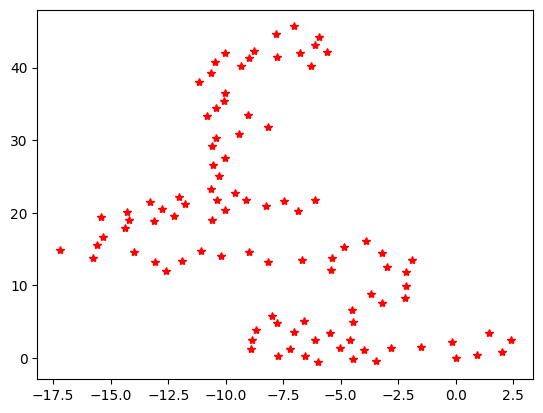

In [18]:
import numpy as np
from numpy import sin, cos
import matplotlib.pyplot as plt
import time

π = np.pi

######################################

#### user defines
x_center = 0.0
y_center = 0.0
N        = 30 ## num of random points we generate
R        = 1.0 ## minimum separation
center = np.array([0,0])
DesiredNumOfPoints=100 ## number of points to be sampled

#######################################

#fig, axes = plt.subplots(int(DesiredNumOfPoints/2), int(DesiredNumOfPoints/2))

def draw(active_list,x_center,y_center):
  active_list=np.asarray(active_list)
  #axes[axisx,axisy].plot(active_list.T[0],active_list.T[1])
  circle1 = plt.Circle((x_center, y_center), R , color='r', fill=False)
  circle2 = plt.Circle((x_center, y_center), 2*R , color='r', fill=False)
  plt.scatter(active_list.T[0],active_list.T[1])
  plt.gca().add_patch(circle1)
  plt.gca().add_patch(circle2)
  plt.gca().set_aspect('equal')
  for xy in zip(active_list.T[0], active_list.T[1]):
   plt.annotate('(%.2f, %.2f)' % xy, xy=xy)
  plt.show()

#############################################

# In the above line we are finding the radial distance r from the center of the circle
# we are taking a random number between [0,1] and then multiplying with R (min dist which is a radius of circle) and
# adding R to make it R distance away from the point
# basically finding a point between circles with radius R and 2R


# the same way we are trying to find the random angle fro the center of the circle
# we are multiplying random value [0,1] by 2 * PI (which represents a full circle, or 360 degrees)
# ensures that theta ranges from 0 to 2π radians (or 0 to 360 degrees), covering all possible directions around the circle.

#######################################################
ptime_taken=[]
ptime_taken.append(0)
start=time.time()
active_list = []
active_list.append(center)
numOfPoints=1
for base_point in active_list:
  r = R+np.random.rand(N)*R
  θ = 2*π*np.random.rand(N)
  sample_pts = np.asarray([base_point[0]+r*cos(θ), base_point[1]+r*sin(θ)])
  for i in sample_pts.T:
    flag=True
    for j in active_list:
      if(np.linalg.norm(j-i)<R):
        flag=False
        break
    if(flag):
      numOfPoints=numOfPoints+1
      active_list.append(np.array(i))
      #axisy=axisy+1
      #plt.plot(i[0], i[1], 'r*')
      break
  #draw(active_list,base_point[0],base_point[1])
  #axisx=axisx+1
  #if(numOfPoints>=DesiredNumOfPoints):
    #print("Time taken",time.time()-start)
    #break
  if(numOfPoints>=DesiredNumOfPoints):
      print(len(active_list))
      print("Time taken",time.time()-start)
      break
print(len(active_list),active_list)
active_list=np.asarray(active_list)
plt.plot(active_list.T[0],active_list.T[1], 'r*')
plt.show()


# Basic implementation of the generating random points with min separation

## Generating the random number of points

In [19]:
import numpy as np
import math
import time

N=100
min_Dist=0.2
time_taken=[]
time_taken.append(0)
for num in range(1,N):
  generatedPoints=[]
  while(True):
    start=time.time()
    xn=np.random.randn(30)
    yn=np.random.randn(30)
    points=[[abs(xn[i]),abs(yn[i])] for i in range(30)]
    rng = np.random.default_rng()
    x=rng.random(size=(10,))
    y=rng.random(size=10,)
    generatedPoints.append(points[0])
    points.pop(0)
    for i in points:
      flag=True
      for j in generatedPoints:
        if(math.dist(i,j)<min_Dist):
          flag=False
      if(flag):
        generatedPoints.append(i)
        break
    if(len(generatedPoints)>=num):
      time_taken.append(time.time()-start)
      #print(time_taken)
      break
len(time_taken)
print(len(generatedPoints))

99


## plot after generating the random points with the given range

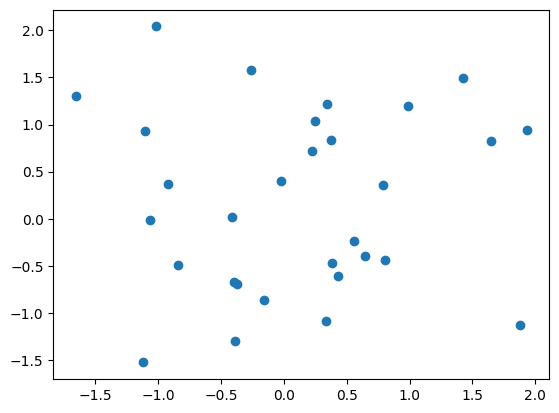

In [20]:
from matplotlib import pyplot as pt
pt.scatter(xn,yn)

## plots after maximizing the distance between points that is deleting the closest points

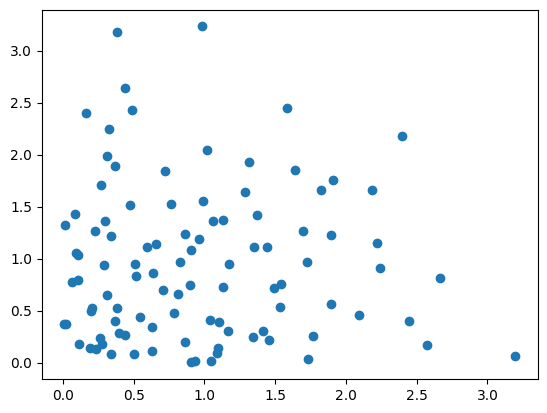

In [21]:
from matplotlib import pyplot as pt
x=[]
for i in generatedPoints:
  x.append(i[0])
y=[]
for i in generatedPoints:
  y.append(i[1])
pt.scatter(x,y)

## PDS for different N

99 [array([0, 0]), array([-0.11259383, -2.82304726]), array([-2.69982762, -0.20563586]), array([-5.37107385,  0.52725299]), array([-2.88512748,  2.07202252]), array([-5.3785978 ,  4.60075179]), array([-6.10306203,  6.65532819]), array([-8.02132359,  5.87092461]), array([-6.07280459,  8.86746423]), array([-7.11283256, 10.63254771]), array([-10.32212697,  12.28063047]), array([-12.30242479,  10.53976463]), array([-11.13191083,   8.18899122]), array([-8.16574031,  8.52614219]), array([-9.56520219, 10.40067735]), array([-7.96229461, 14.02750902]), array([-5.525149  , 13.88353552]), array([-3.71866299, 12.64835309]), array([-0.17855261, 13.98059041]), array([ 2.33639182, 16.67783051]), array([-0.48525093, 18.10044385]), array([ 0.706171  , 20.29128513]), array([ 1.96831245, 24.02574814]), array([ 3.33093507, 27.55935781]), array([ 0.55895841, 26.21886022]), array([-0.0494805 , 28.46209082]), array([ 0.28941768, 31.82217753]), array([-2.43628912, 32.60667903]), array([-2.58384011, 36.4422362

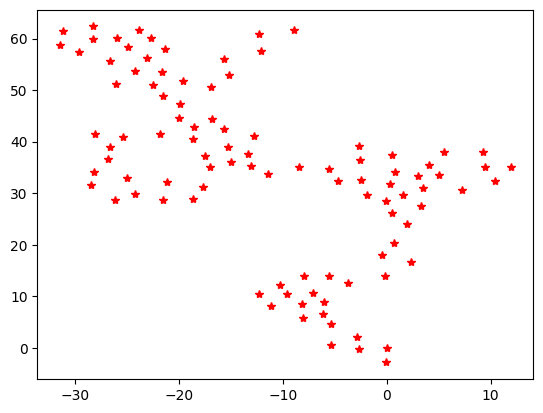

In [22]:
import numpy as np
from numpy import sin, cos
import matplotlib.pyplot as plt
import time

π = np.pi
np.random.seed(seed=156)

######################################

#### user defines
x_center = 0.0
y_center = 0.0
N        = 30 ## num of random points we generate
R        = 2.0 ## minimum separation
center = np.array([0,0])
DesiredNumOfPoints=100 ## number of points to be sampled

#######################################

#fig, axes = plt.subplots(int(DesiredNumOfPoints/2), int(DesiredNumOfPoints/2))

def draw(active_list,x_center,y_center,axisx,axisy):
  active_list=np.asarray(active_list)
  #axes[axisx,axisy].plot(active_list.T[0],active_list.T[1])
  circle1 = plt.Circle((x_center, y_center), R , color='r', fill=False)
  circle2 = plt.Circle((x_center, y_center), 2*R , color='r', fill=False)
  plt.scatter(active_list.T[0],active_list.T[1])
  plt.gca().add_patch(circle1)
  plt.gca().add_patch(circle2)
  plt.gca().set_aspect('equal')
  for xy in zip(active_list.T[0], active_list.T[1]):
   plt.annotate('(%.2f, %.2f)' % xy, xy=xy)
  plt.show()

#############################################

# In the above line we are finding the radial distance r from the center of the circle
# we are taking a random number between [0,1] and then multiplying with R (min dist which is a radius of circle) and
# adding R to make it R distance away from the point
# basically finding a point between circles with radius R and 2R


# the same way we are trying to find the random angle fro the center of the circle
# we are multiplying random value [0,1] by 2 * PI (which represents a full circle, or 360 degrees)
# ensures that theta ranges from 0 to 2π radians (or 0 to 360 degrees), covering all possible directions around the circle.

#######################################################
ptime_taken=[]
ptime_taken.append(0)
for num in range(1,DesiredNumOfPoints):
  #DesiredNumOfPoints=num
  start=time.time()
  active_list = []
  active_list.append(center)
  numOfPoints=1
  for base_point in active_list:
    r = R+np.random.rand(N)*R
    θ = 2*π*np.random.rand(N)
    sample_pts = np.asarray([base_point[0]+r*cos(θ), base_point[1]+r*sin(θ)])
    for i in sample_pts.T:
      flag=True
      for j in active_list:
        if(np.linalg.norm(j-i)<R):
          flag=False
          break
      if(flag):
        active_list.append(np.array(i))
        #axisy=axisy+1
        #plt.plot(i[0], i[1], 'r*')
        break
    #draw(active_list,base_point[0],base_point[1],axisx,axisy)
    #axisx=axisx+1
    numOfPoints=numOfPoints+1
    if(numOfPoints>=num):
      ptime_taken.append(time.time()-start)
      break
print(len(active_list),active_list)
active_list=np.asarray(active_list)
plt.plot(active_list.T[0],active_list.T[1], 'r*')
plt.show()


## time taken

100


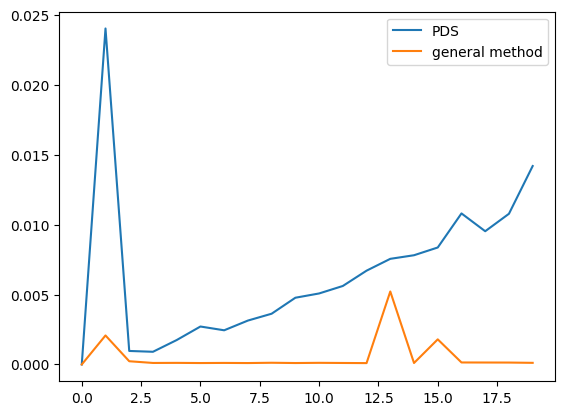

In [23]:
import matplotlib.pyplot as plt

ptime=[0, 0.02403545379638672, 0.0009675025939941406, 0.0009081363677978516, 0.0017478466033935547, 0.002715587615966797, 0.002445697784423828, 0.003141164779663086, 0.0036308765411376953, 0.004774332046508789, 0.005079984664916992, 0.005615234375, 0.006710529327392578, 0.0075571537017822266, 0.007814645767211914, 0.008368253707885742, 0.010805606842041016, 0.009531736373901367, 0.010780096054077148, 0.014195919036865234] #, 0.012491941452026367]
gtime=[0, 0.0003979206085205078, 0.0002810955047607422, 0.00022268295288085938, 0.00010943412780761719, 0.00010442733764648438, 0.00011157989501953125, 0.00011348724365234375, 0.00012540817260742188, 0.00010943412780761719, 0.00010943412780761719, 0.00011324882507324219, 0.00017213821411132812, 0.00012302398681640625, 0.00011324882507324219, 0.00012159347534179688, 0.00011754035949707031, 0.00011467933654785156, 7.891654968261719e-05, 7.2479248046875e-05]
x=[i for i in range(20)]
#ptime=ptime_taken
#print(len(ptime_taken))
gtime=time_taken
print(len(time_taken))
plt.plot(x,ptime,label="PDS")
plt.plot(x,gtime[:20:],label="general method")
plt.legend()
plt.show()